In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [100]:
# Step 1: Load and preprocess the data
data = pd.read_csv('eeg_data.csv')  # Assuming the data is stored in a CSV file
eeg_data = data.drop(['state'], axis=1).values  # Extract EEG data
labels = data['state'].values  # Extract labels

FileNotFoundError: [Errno 2] No such file or directory: 'eeg_data.csv'

In [ ]:

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(eeg_data, labels, test_size=0.2, random_state=42)




In [ ]:

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Step 4: Train the machine learning model
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can modify the model parameters as per your requirements
model.fit(X_train_scaled, y_train)

In [ ]:
# Step 5: Make predictions on the testing set
y_pred = model.predict(X_test_scaled)




In [ ]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



In [ ]:
# Step 7: Predict on new, unseen data
new_data = np.array([[...], [...], ...])  # Replace the ellipsis with your new EEG data
new_data_scaled = scaler.transform(new_data)
new_predictions = model.predict(new_data_scaled)
print(f"New data predictions: {new_predictions}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the EEG data and Stroop test scores
eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/pre1_cog.csv')
stroop_scores = pd.read_csv('brainsurf/data/samples/stroop.csv')

# Step 2: Pair the data based on a common identifier (e.g., Trial or Participant ID)
paired_data = pd.merge(eeg_data, stroop_scores, on='ID')

# Step 3: Split the data into features (EEG data) and target variable (Accuracy)
X = paired_data[['EEG']]
y = paired_data['Accuracy']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 6: Make predictions on the testing set
y_pred = reg_model.predict(X_test)

# Step 7: Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.2670810919139093


In [ ]:
print(X.shape)
print(y.shape)

(962640, 1)
(962640,)


In [ ]:
print(len(X_train))
print(len(y_train))

770112
770112


In [ ]:
print(len(X_test))
print(len(y_test))

192528
192528


In [ ]:
print(len(X_test))
print(len(y_test))
print(len(y_pred))


192528
40
192528


In [ ]:
print(X_test.to_numpy())
print(y_test.to_numpy())
print(y_pred)

[[-12.0911 ]
 [ 21.2036 ]
 [-14.2212 ]
 ...
 [  1.25732]
 [ -2.18506]
 [  4.53491]]
[4 4 1 ... 2 4 1]
[2.32396272 2.32622343 2.32381809 ... 2.32486908 2.32463534 2.32509163]


c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


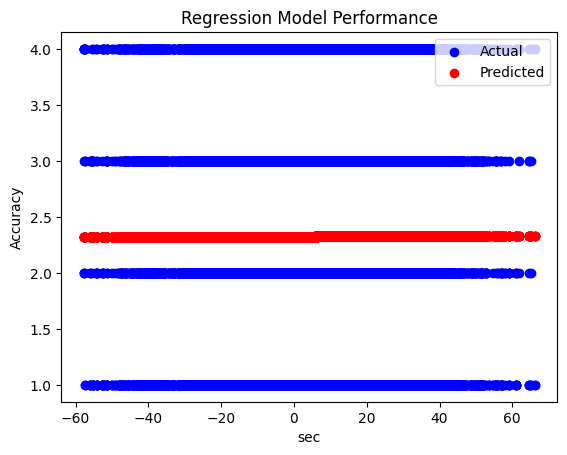

In [ ]:
import matplotlib.pyplot as plt
    # Visualize the data and model performance
plt.scatter(X_test['EEG'].to_numpy(), y_test.to_numpy(), color='blue', label='Actual')
plt.scatter(X_test['EEG'].to_numpy(), y_pred, color='red', label='Predicted')
plt.xlabel('sec')
plt.ylabel('Accuracy')
plt.title('Regression Model Performance')
plt.legend()
plt.show()


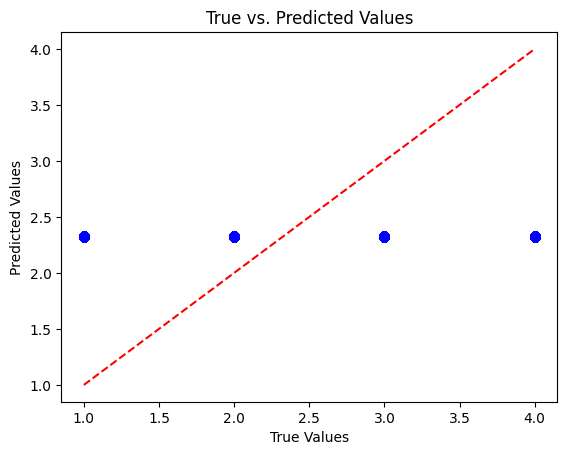

In [ ]:
import matplotlib.pyplot as plt

def visualize_regression_results(y_test, y_pred):
    # Create a scatter plot to compare predicted vs. true values
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs. Predicted Values')
    plt.show()

# Assuming you have the y_test and y_pred arrays
visualize_regression_results(y_test, y_pred)


This function will create a scatter plot where the x-axis represents the true values (y_test) and the y-axis represents the predicted values (y_pred). The function also includes a diagonal line (in red) that represents perfect predictions. The points on the scatter plot that align closely with the diagonal line indicate accurate predictions, while deviations from the line suggest discrepancies between the predicted and true values.

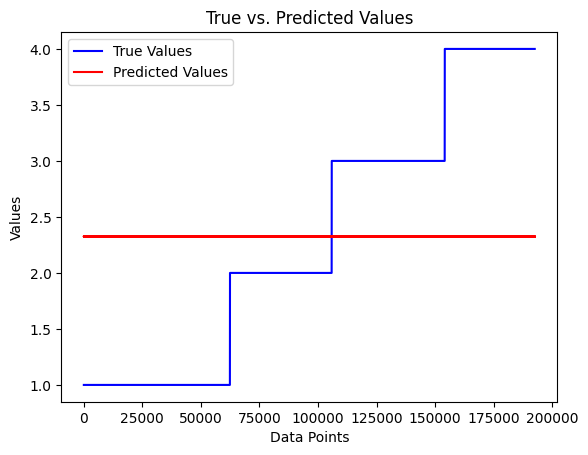

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_regression_results(y_test, y_pred):
    # Reset the index of y_test and y_pred
    y_test = y_test.reset_index(drop=True)
    y_pred = pd.Series(y_pred, name='Predicted Values')

    # Sort the values based on the true values to maintain the order in the line plot
    sorted_indices = np.argsort(y_test)
    sorted_y_test = y_test[sorted_indices]
    sorted_y_pred = y_pred[sorted_indices]

    # Create a line plot to compare predicted vs. true values
    plt.plot(range(len(sorted_y_test)), sorted_y_test, color='blue', label='True Values')
    plt.plot(range(len(sorted_y_pred)), sorted_y_pred, color='red', label='Predicted Values')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.title('True vs. Predicted Values')
    plt.legend()
    plt.show()

# Assuming you have the y_test and y_pred arrays as pandas Series
visualize_regression_results(y_test, y_pred)


In [ ]:
# Step 8: Predict the accuracy of the Stroop test after meditation
post_eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/post_cog_1.csv')  # Replace with the new EEG data file
stroop_post = pd.read_csv('brainsurf/data/samples/adarsh/post_stroop1.csv') 
post_eeg_data.head()

,sec,EEG,ID
0,62.000,-6.94580,1
1,62.005,-6.14624,1
2,62.010,-7.88574,1
3,62.015,-10.26610,1
4,62.020,-12.02390,1


In [ ]:
stroop_post.head()

,ID,color1,color2,Congruent,Response Time,Accuracy,Trial,Block
0,1,yellow,blue,0,3,3,1,981
1,1,green,blue,0,11,3,1,898
2,1,red,green,0,6,2,1,1114
3,1,yellow,red,0,4,1,1,1216
4,1,yellow,red,0,4,1,1,1087


In [ ]:
paired_data = pd.merge(post_eeg_data, stroop_post, on='ID')
len(new_predictions)
paired_data.head()

,sec,EEG,ID,color1,color2,Congruent,Response Time,Accuracy,Trial,Block
0,62.0,-6.9458,1,yellow,blue,0,3,3,1,981
1,62.0,-6.9458,1,green,blue,0,11,3,1,898
2,62.0,-6.9458,1,red,green,0,6,2,1,1114
3,62.0,-6.9458,1,yellow,red,0,4,1,1,1216
4,62.0,-6.9458,1,yellow,red,0,4,1,1,1087


In [ ]:
X_new = paired_data[['sec', 'EEG']]
y_new = paired_data['Accuracy']

In [ ]:
new_predictions = reg_model.predict(X_new)
print(f"Predictions for new EEG data: {new_predictions}")

Predictions for new EEG data: [2.32503807 2.32503807 2.32503807 ... 2.32443839 2.32443839 2.32443839]


In [ ]:
new_labels = y  # Replace the ellipsis with the actual ground truth labels for the new EEG data
mse = mean_squared_error(y_new, new_predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3894831908643284


Mean Squared Error: 1.2670810919139093


c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


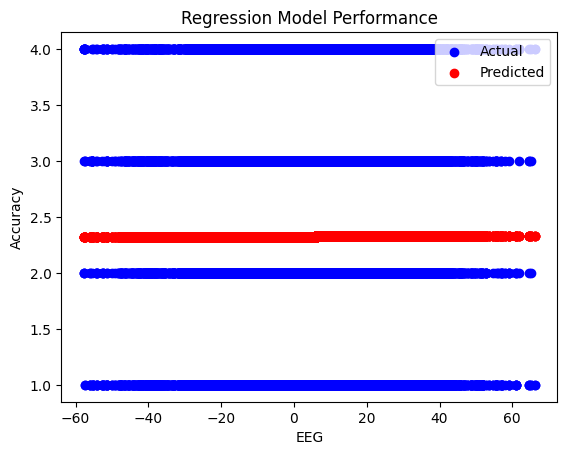

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def visualize_regression():
    # Step 1: Load the EEG data and Stroop test scores
    eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/pre1_cog.csv')
    stroop_scores = pd.read_csv('brainsurf/data/samples/stroop.csv')

    # Step 2: Pair the data based on a common identifier (e.g., Trial or Participant ID)
    paired_data = pd.merge(eeg_data, stroop_scores, on='ID')
    
    paired_data.head()
    # Step 3: Split the data into features (EEG data) and target variable (Accuracy)
    X = paired_data[['EEG']]
    y = paired_data['Accuracy']

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 5: Train a regression model
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)

    # Step 6: Make predictions on the testing set
    y_pred = reg_model.predict(X_test)

    # Step 7: Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # Visualize the data and model performance
    plt.scatter(X_test['EEG'], y_test, color='blue', label='Actual')
    plt.scatter(X_test['EEG'], y_pred, color='red', label='Predicted')
    plt.xlabel('EEG')
    plt.ylabel('Accuracy')
    plt.title('Regression Model Performance')
    plt.legend()
    plt.show()

# Call the function to execute the steps and visualize the results
visualize_regression()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def detect_distraction_eeg(eeg_data, num_clusters=2):
    # Extract the 'EEG' values from the DataFrame
    eeg_values = eeg_data['EEG'].values

    # Reshape the EEG data
    reshaped_data = eeg_values.reshape(-1, 1)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(reshaped_data)

    # Identify the cluster with the highest average distance to centroid
    centroid_distances = np.zeros(num_clusters)
    for i in range(num_clusters):
        cluster_points = reshaped_data[clusters == i]
        centroid_distances[i] = np.mean(np.linalg.norm(cluster_points - kmeans.cluster_centers_[i], axis=1))

    distracted_cluster = np.argmax(centroid_distances)

    # Identify the indices of the distracted segments
    distracted_indices = np.where(clusters == distracted_cluster)[0]

    # Get the corresponding 'sec' values for the distracted segments
    distracted_segments = eeg_data.iloc[distracted_indices]

    return distracted_segments

# eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/adarsh_post_med.csv') 
eeg_data = pd.read_csv('brainsurf/data/samples/mantra_meditation/sample_data.csv') 

print(len(eeg_data))
# Assuming you have 'eeg_data' stored as a DataFrame
distracted_segments = detect_distraction_eeg(eeg_data, num_clusters=2)

7141


In [ ]:
eeg_data.head()

,sec,EEG,alpha,beta,delta,theta
0,2.440,-9.51538,-0.458429,-0.300244,-8.22506,0.938709
1,2.445,-8.83179,-0.477408,-0.096552,-7.79171,0.806110
2,2.450,-7.40356,-0.456316,0.177482,-7.35087,0.663650
3,2.455,-7.04956,-0.390345,0.317293,-6.90547,0.517710
4,2.460,-7.83081,-0.279366,0.224235,-6.45845,0.374589


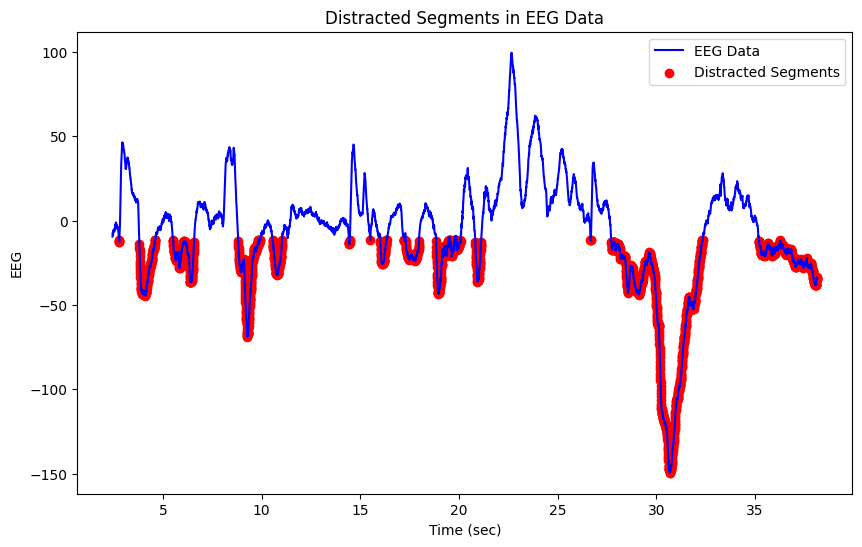

In [ ]:
import matplotlib.pyplot as plt

def visualize_distracted_segments(eeg_data, distracted_segments):
    plt.figure(figsize=(10, 6))
    plt.plot(eeg_data['sec'], eeg_data['EEG'], color='blue', label='EEG Data')
    plt.scatter(distracted_segments['sec'], distracted_segments['EEG'], color='red', label='Distracted Segments')
    plt.xlabel('Time (sec)')
    plt.ylabel('EEG')
    plt.title('Distracted Segments in EEG Data')
    plt.legend()
    plt.show()

# Assuming you have eeg_data stored as a DataFrame and distracted_segments as a subset of eeg_data
visualize_distracted_segments(eeg_data, distracted_segments)


Detected Change Points:
[15, 20, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100, 105, 110, 120, 125, 130, 135, 140, 145, 150, 160, 165, 170, 175, 180, 190, 195, 200, 205, 210, 215, 220, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 375, 380, 385, 390, 395, 400, 405, 410, 420, 425, 430, 435, 440, 445, 450, 455, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 530, 535, 540, 545, 550, 555, 560, 565, 570, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 650, 655, 660, 665, 670, 675, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 860, 865, 875, 880, 885, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1020, 1025, 1030, 1040, 1045, 1050, 1055, 1065, 1070, 1075, 1080, 1085, 1090, 1105, 11

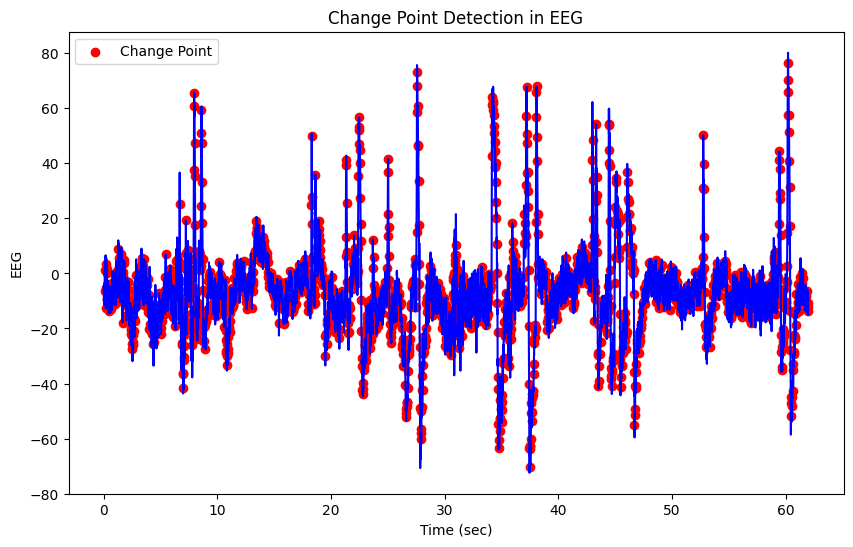

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ruptures import Pelt

def detect_change_points(eeg_data):
    """
    Apply change-point detection algorithms to identify abrupt changes in EEG signals.

    Args:
        eeg_data (pandas.DataFrame): DataFrame containing EEG data with columns 'sec' and 'EEG'.

    Returns:
        list: List of change-point indices indicating the detected change points.
    """
    # Extract the EEG values from the DataFrame
    eeg_values = eeg_data['EEG'].values

    # Perform change-point detection using the Pelt algorithm
    model = Pelt()
    result = model.fit_predict(eeg_values, pen=1)

    return result

def visualize_change_points(eeg_data, change_points):
    """
    Visualize the EEG data with detected change points.

    Args:
        eeg_data (pandas.DataFrame): DataFrame containing EEG data with columns 'sec' and 'EEG'.
        change_points (list): List of change-point indices indicating the detected change points.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(eeg_data['sec'], eeg_data['EEG'], color='blue')
    
    # Handle out-of-bounds indices
    valid_change_points = [idx for idx in change_points if idx < len(eeg_data)]
    
    plt.scatter(eeg_data['sec'][valid_change_points], eeg_data['EEG'][valid_change_points], color='red', label='Change Point')
    plt.xlabel('Time (sec)')
    plt.ylabel('EEG')
    plt.title('Change Point Detection in EEG')
    plt.legend()
    plt.show()

# Assuming you have the EEG data stored in the variable 'eeg_data'
eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/adarsh_post_med.csv')
change_points = detect_change_points(eeg_data)

# Print the detected change points
print("Detected Change Points:")
print(change_points)

# Visualize the change points
visualize_change_points(eeg_data, change_points)


In [5]:
! pip install pyeeg


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'pyeeg'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nolds import ap_entropy, sampen

def calculate_entropy_measures(eeg_data, m=2, r=0.2):
    """
    Calculate entropy measures (approximate entropy and sample entropy) for EEG signals.

    Args:
        eeg_data (pandas.DataFrame): DataFrame containing EEG data with columns 'sec' and 'EEG'.
        m (int): Embedding dimension for entropy calculation.
        r (float): Tolerance threshold for entropy calculation.

    Returns:
        tuple: Tuple of approximate entropy and sample entropy values.
    """
    eeg_values = eeg_data['EEG'].values

    # Calculate approximate entropy
    ae = ap_entropy(eeg_values, m, r)

    # Calculate sample entropy
    se = sampen(eeg_values, m, r)

    return ae, se

def visualize_entropy_measures(ae, se):
    """
    Visualize the entropy measures.

    Args:
        ae (float): Approximate entropy value.
        se (float): Sample entropy value.
    """
    measures = ['Approximate Entropy', 'Sample Entropy']
    values = [ae, se]

    plt.bar(measures, values)
    plt.ylabel('Entropy')
    plt.title('Entropy Measures')
    plt.show()

# Assuming you have the EEG data stored in the variable 'eeg_data'
eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/adarsh_post_med.csv')

# Calculate entropy measures
ae, se = calculate_entropy_measures(eeg_data)

# Print the entropy measures
print("Approximate Entropy:", ae)
print("Sample Entropy:", se)

# Visualize the entropy measures
visualize_entropy_measures(ae, se)


ImportError: cannot import name 'ap_entropy' from 'nolds' (c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\nolds\__init__.py)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nolds import ap_entropy

def calculate_entropy_measures(eeg_data, m=2, r=0.2):
    """
    Calculate entropy measures (approximate entropy) for EEG signals.

    Args:
        eeg_data (pandas.DataFrame): DataFrame containing EEG data with columns 'sec' and 'EEG'.
        m (int): Embedding dimension for entropy calculation.
        r (float): Tolerance threshold for entropy calculation.

    Returns:
        float: Approximate entropy value.
    """
    eeg_values = eeg_data['EEG'].values
    entropy = ap_entropy(eeg_values, m, r)

    return entropy

eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/adarsh_post_med.csv')
entropy_value = calculate_entropy_measures(eeg_data)
print("Approximate Entropy:", entropy_value)


# # Assuming you have the EEG data stored in the variable 'eeg_data'
# eeg_data = pd.read_csv('brainsurf/data/samples/adarsh/adarsh_post_med.csv')

# # Calculate entropy measures
# ae, se = calculate_entropy_measures(eeg_data)

# # Print the entropy measures
# print("Approximate Entropy:", ae)
# print("Sample Entropy:", se)

# # Visualize the entropy measures
# visualize_entropy_measures(ae, se)


ImportError: cannot import name 'ap_entropy' from 'nolds' (c:\Users\Preethi V Hiremath\AppData\Local\Programs\Python\Python310\lib\site-packages\nolds\__init__.py)